In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정 - 윈도우 
plt.rcParams['font.family'] = 'Malgun Gothic'

# 글자 크기
plt.rcParams['font.size'] = 15

# 폰트 설정 시 - 기호 깨는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 크기
plt.rcParams['figure.figsize'] = 15,7

# sns.set_style('ticks')

# 1.타이타닉 사망 생존 데이터
- 타이타닉 호 승객에 관련된 정보
- kaggle에서 제공되는 데이터
- train.csv를 학습시켜 test.csv에 대한 사망 생존을 예측한다.

In [ ]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
display(train_df)group
display(test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- Passengerld : 승객번호 1부터 1씩 증가하는 값. 의미없음
- Survived : 생존여부. 0 - 사망, 1 - 생존
- Pclass : 생존 등급. 1 ~ 3 등급
- Name : 승객 이름
- Sex : 성별. male : 남자, female : 여자
- Age : 승객 닝;
- SibSp : 동승한 형제 자매 수
- Parch : 동승한 부모 자식 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 선착장. C - cherbourg, Q - Queenstown, S - Southampton

# 2.결측치 확인

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3.데이터 전처리

In [ ]:
# 처리의 용이성을 위해 두 데이터 프레임을 합친다.
data = pd.concat([train_df,test_df])
# 인덱스를 초기화한다.
data.reset_index(drop=True,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 전체 결측치 확인 
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 4.Passengerid

- 승객 일련 번호
- 1부터 1씩 증가시킨 값으로 의미가 없다.
- 사용하지 않을 것이다.

# 5.Pclass
- 승객 등급 
- 1 : 1등급, 2 : 2등급, 3 : 3등급

In [ ]:
# 결측치 확인
data['Pclass'].isna().sum()

0

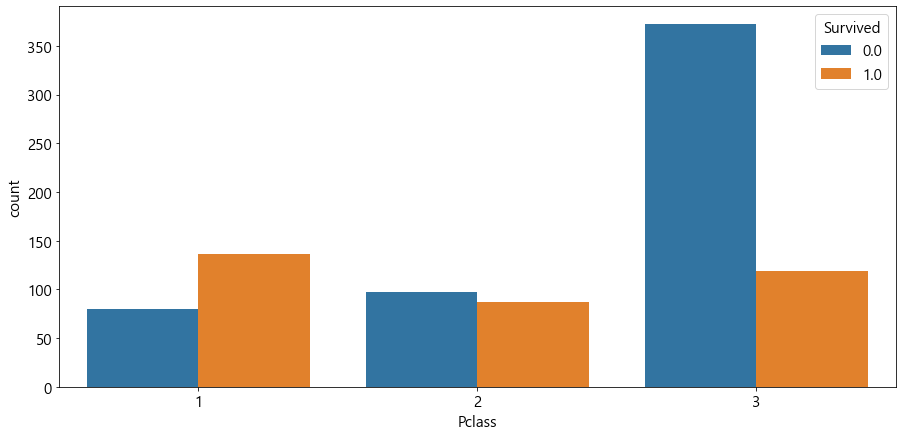

In [ ]:
# 시각화 
# x에 설정한 컬럼을 기준으로 그룹을 나누고 각 그룹 안에서
# hue에 설정한 컬럼을 기준으로 그룹을 나누어 그 수를 계산해 시각화한다.
sns.countplot(x='Pclass', data=data, hue='Survived')
plt.show()

1등석은 생존 확률이 높고 3등석은 사망확률이 높다.

# 6.Name
- 승객의 이름

In [ ]:
# 결측치 확인
data['Name'].isna().sum()

0

In [ ]:
data['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [ ]:
# Lastname 컬럼 추가
data['Lastname'] = 0

In [ ]:
# 정규식 : 문자열의 양식을 지정할 때 사용하는 문자식
# ([A-Za_z]+) : 앞에서부터 대소문자 영문에 해당하는 것 까지만 해당
# 한글의 범위의 경우 : 가 - 힣
data['Lastname'] = data['Name'].str.extract('([A-Za-z]+)')
data['Lastname']

0          Braund
1         Cumings
2       Heikkinen
3        Futrelle
4           Allen
          ...    
1304      Spector
1305        Oliva
1306      Saether
1307         Ware
1308        Peter
Name: Lastname, Length: 1309, dtype: object

In [ ]:
data['Lastname'].value_counts()

O              12
Sage           11
Andersson      11
Goodwin         8
Asplund         8
               ..
Holm            1
Serepeca        1
Moen            1
Rintamaki       1
Francatelli     1
Name: Lastname, Length: 853, dtype: int64

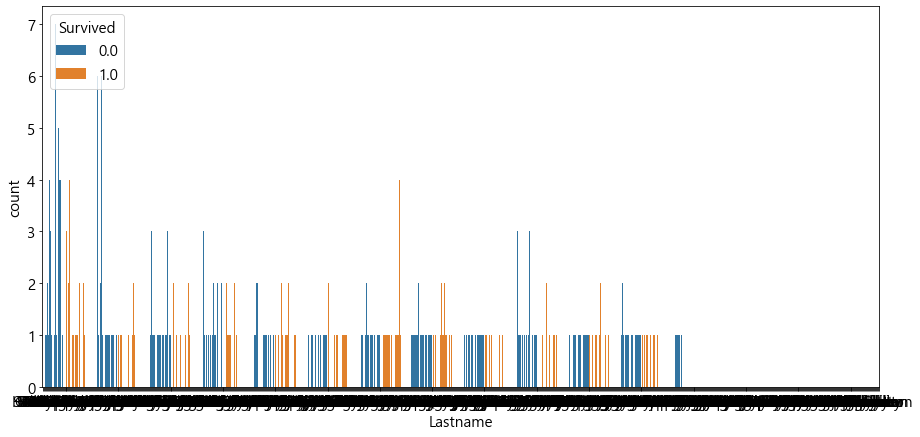

In [ ]:
sns.countplot(x='Lastname',hue='Survived',data=data)
plt.show()

이름 중 일부는 사망 생존률이 다르다.

# 7.Sex
- 성별
- male : 남성, female : 여성

In [ ]:
# 결측치 확인 
data['Sex'].isna().sum()

0

In [ ]:
# 값 종류 확인
data['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

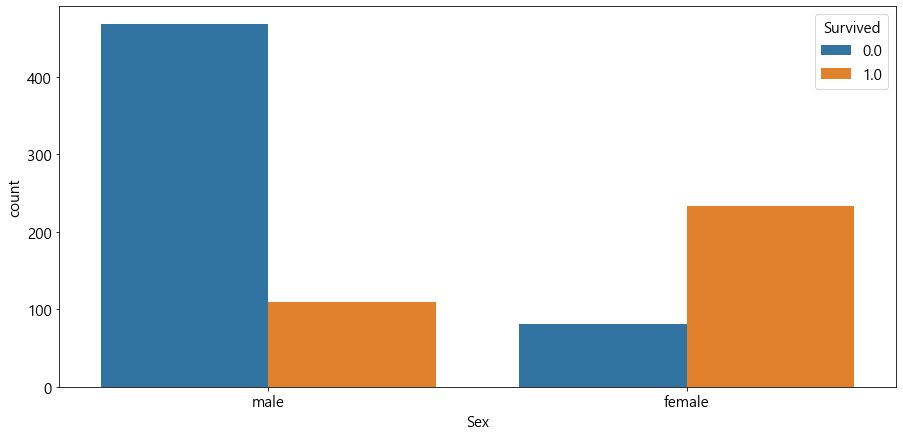

In [ ]:
# 시각화
sns.countplot(x='Sex',hue='Survived',data=data)
plt.show()

남성은 사망확률이 높고 여성은 생존확률이 높다.

# 8.Age
- 나이

In [ ]:
# 결측치 확인
data['Age'].isna().sum()

263

In [ ]:
# 이름 중간의 Sir Name을 가져온다.
# ([A-Za-z]+)\. : A-Z, a-z로 구성되어 있고 마지막이 . 으로 끝나는 것

data['Sirname'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Sirname'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Sir           1
Capt          1
Jonkheer      1
Dona          1
Lady          1
Countess      1
Mme           1
Don           1
Name: Sirname, dtype: int64

In [ ]:
# Sirname을 기준으로 나이의 평균을 구한다.
data.groupby('Sirname')['Age'].mean()

Sirname
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [ ]:
a1 = data.groupby('Sirname')['Age']

# 결측치인 부분에 데이터를 평균으로 담아준다.
data['Age'] = a1.apply(lambda x : x.fillna(x.mean()))
data['Age'].isna().sum()

0

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Sirname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr


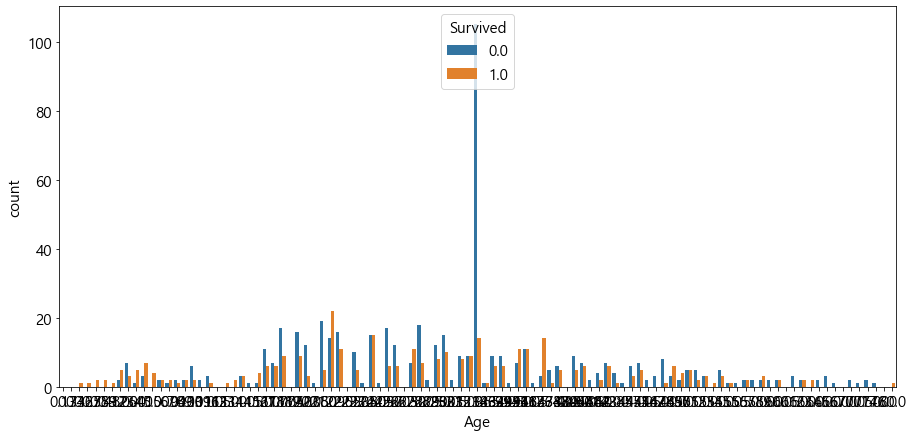

In [ ]:
sns.countplot(x='Age',hue='Survived',data=data)
plt.show()

유아기 아이들의 생존 비율이 높다.

# 9.SibSp
- 동승한 형제 자매 수 

In [ ]:
data['SibSp'].isna().sum()

0

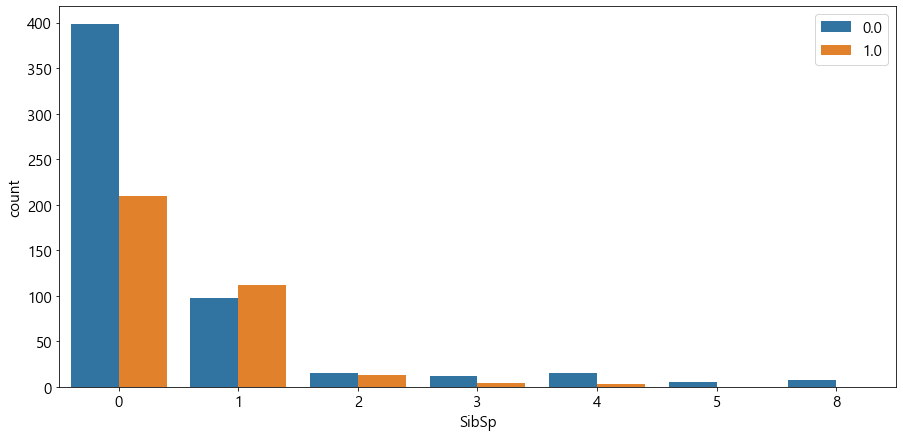

In [ ]:
sns.countplot(x='SibSp', hue='Survived',data=data)
plt.legend(loc=1)
plt.show()

동승한 형제 자매수가 1명인 경우 생존율이 올라간다.

# 10.Parch

- 동승한 부모 자식 수

In [ ]:
# 결측치 확인
data['Parch'].isna().sum()

0

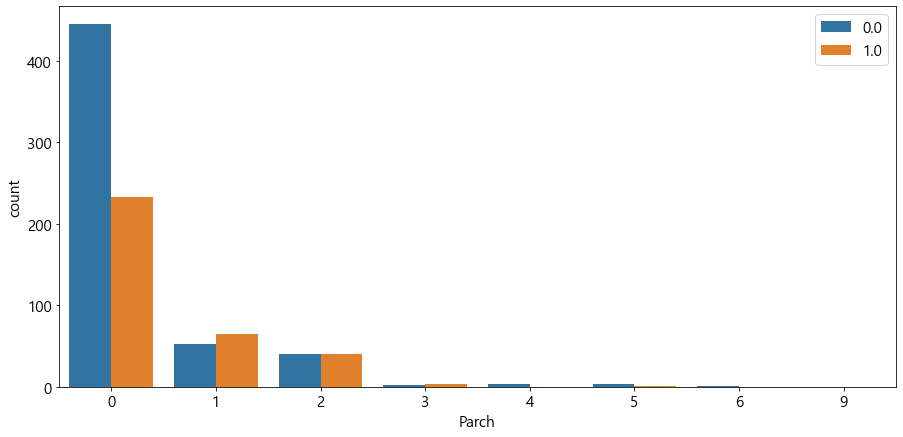

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=data)
plt.legend(loc=1)
plt.show()

동승한 부모 자식이 없을 경우 사망율이 올라간다.

# 11.Ticket
- 티켓 번호

In [ ]:
data['Ticket'].isna().sum()

0

In [ ]:
data['Ticket'].value_counts()

CA. 2343           11
1601                8
CA 2144             8
PC 17608            7
347082              7
                   ..
349220              1
3470                1
312993              1
STON/OQ. 369943     1
PC 17595            1
Name: Ticket, Length: 929, dtype: int64

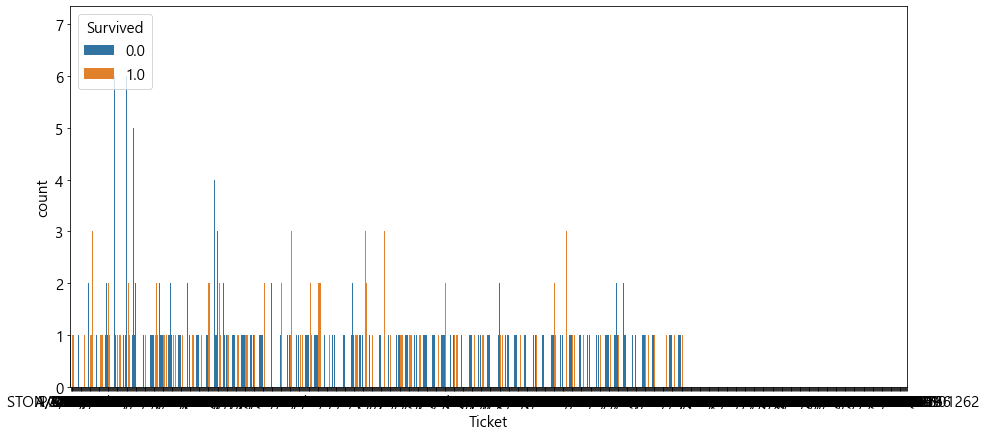

In [ ]:
sns.countplot(x='Ticket',hue='Survived',data=data)
plt.show()

티켓 번호가 같은 것 중 일부는 사망 생존률이 달라진다.

# 12.Fare
- 요금

In [ ]:
data['Fare'].isna().sum()

1

In [ ]:
a1 = data['Fare'].mean()

data['Fare'].fillna(a1,inplace=True)

data['Fare'].isna().sum()

0

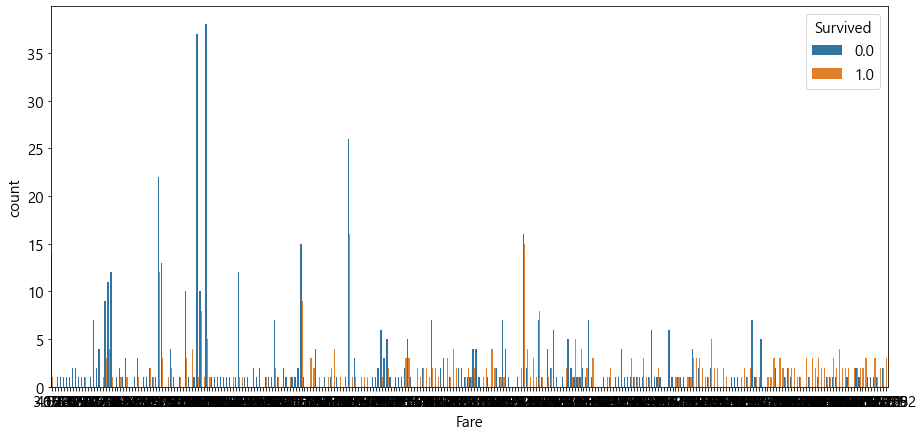

In [ ]:
sns.countplot(x='Fare', hue='Survived', data=data)
plt.show()

요금이 비쌀수록 생존확률이 올라간다.

# 13.Cabin
- 객실

In [ ]:
data['Cabin'].isna().sum()

1014

In [ ]:
# 앞의 알파벳 부분만 추출한다.
# ([A-Za-z]) : 앞에 알파벳으로 시작하는 것들 중에 한 글자만 가져온다.

data['Cabin2'] = data['Cabin'].str.extract('([A-Z-a-z]+)')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Sirname,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva,Dona,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,NaN


In [ ]:
# 1등석 사람들의 객실 정보를 확인한다,
a1 = data.query('Pclass == 1')
a1['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [ ]:
# 2등석 사람들의 객실 정보를 확인한다,
a1 = data.query('Pclass == 2')
a1['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [ ]:
# 3등석 사람들의 객실 정보를 확인한다,
a1 = data.query('Pclass == 3')
a1['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [ ]:
# 각 Pclass에만 있는 객실로 셋팅하는 방법
# 가상의 객실로 셋팅하는 방법
# 컬럼을 제거

data.drop(['Cabin','Cabin2'],axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Sirname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,S,Ware,Mr


# 14.Embarked

In [ ]:
data['Embarked'].isna().sum()

2

In [ ]:
# 결측기가 2개 밖에 없으므로 제일 많이 나오는 것으로 설정한다.
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'].fillna('S',inplace=True)
data['Embarked'].isna().sum()

0

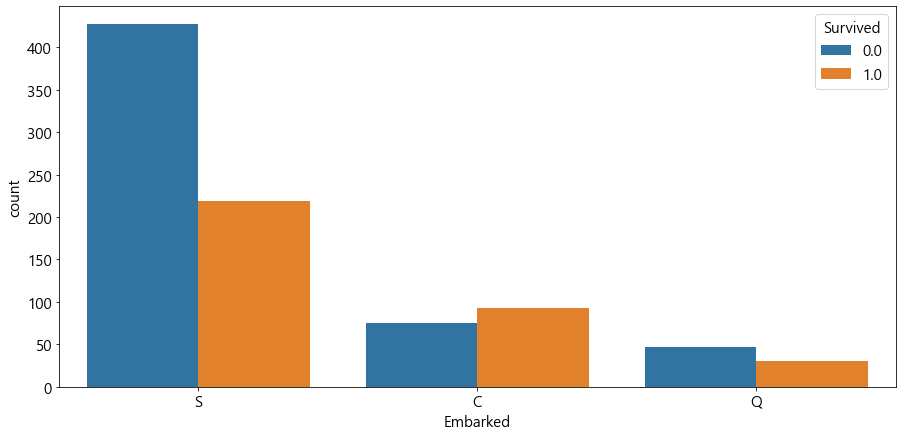

In [ ]:
sns.countplot(x='Embarked',hue='Survived',data=data)
plt.show()

S에서 탑승한 승객은 사망 확률이 높다

# 15.머신러닝 데이터 전처리
- 결측치 처리
- 문자열 --->> 숫자

In [ ]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Lastname         0
Sirname          0
dtype: int64

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Lastname', 'Sirname'],
      dtype='object')

In [ ]:
# 원본 유지를 위해 데이터 프레임을 복제한다.
df1 = data.copy()
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Sirname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,S,Ware,Mr


In [ ]:
drop_list = ['PassengerId','Name','Survived']
df1.drop(drop_list, axis=1,inplace=True)
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Sirname
0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,1,female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,1,female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,3,male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1,female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,3,male,32.252151,0,0,359309,8.0500,S,Ware,Mr


In [ ]:
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Sirname
0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,1,female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,1,female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,3,male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1,female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,3,male,32.252151,0,0,359309,8.0500,S,Ware,Mr


In [ ]:
# 문자 데이터를 숫자로 변형
df1['Sex'] = df1['Sex'].factorize()[0]
df1['Ticket'] = df1['Ticket'].factorize()[0]
df1['Embarked'] = df1['Embarked'].factorize()[0]
df1['Lastname'] = df1['Lastname'].factorize()[0]
df1['Sirname'] = df1['Sirname'].factorize()[0]
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Sirname
0,3,0,22.000000,1,0,0,7.2500,0,0,0
1,1,1,38.000000,1,0,1,71.2833,1,1,1
2,3,1,26.000000,0,0,2,7.9250,0,2,2
3,1,1,35.000000,1,0,3,53.1000,0,3,1
4,3,0,35.000000,0,0,4,8.0500,0,4,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,0,0,926,8.0500,0,850,0
1305,1,1,39.000000,0,0,273,108.9000,1,851,17
1306,3,0,38.500000,0,0,927,7.2500,0,852,0
1307,3,0,32.252151,0,0,928,8.0500,0,799,0


In [ ]:
# 데이터 표준화
# 모든 컬럼의 값의 표준 편차를 비슷한 수준으로 맞춘다.
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(df1)
df1 = scaler1.transform(df1)
df1

array([[ 0.84191642, -0.74349692, -0.5987593 , ..., -0.60343572,
        -1.47099643, -0.54203347],
       [-1.54609786,  1.34499549,  0.61439473, ...,  0.92737312,
        -1.46694979,  0.05320295],
       [ 0.84191642,  1.34499549, -0.29547079, ..., -0.60343572,
        -1.46290314,  0.64843937],
       ...,
       [ 0.84191642, -0.74349692,  0.65230579, ..., -0.60343572,
         1.97674332, -0.54203347],
       [ 0.84191642, -0.74349692,  0.17858063, ..., -0.60343572,
         1.76227125, -0.54203347],
       [ 0.84191642, -0.74349692, -1.85114055, ...,  0.92737312,
        -1.00158585,  1.24367579]])

In [ ]:
n_train = len(train_df)
n_train
df1

array([[ 0.84191642, -0.74349692, -0.5987593 , ..., -0.60343572,
        -1.47099643, -0.54203347],
       [-1.54609786,  1.34499549,  0.61439473, ...,  0.92737312,
        -1.46694979,  0.05320295],
       [ 0.84191642,  1.34499549, -0.29547079, ..., -0.60343572,
        -1.46290314,  0.64843937],
       ...,
       [ 0.84191642, -0.74349692,  0.65230579, ..., -0.60343572,
         1.97674332, -0.54203347],
       [ 0.84191642, -0.74349692,  0.17858063, ..., -0.60343572,
         1.76227125, -0.54203347],
       [ 0.84191642, -0.74349692, -1.85114055, ...,  0.92737312,
        -1.00158585,  1.24367579]])

In [ ]:
X_train = df1[:n_train]
X_test = df1[n_train:]
# X_test.reset_index(inplace=True) 

y_train = train_df['Survived']

display(X_train)
display(X_test)
display(y_train)

array([[ 0.84191642, -0.74349692, -0.5987593 , ..., -0.60343572,
        -1.47099643, -0.54203347],
       [-1.54609786,  1.34499549,  0.61439473, ...,  0.92737312,
        -1.46694979,  0.05320295],
       [ 0.84191642,  1.34499549, -0.29547079, ..., -0.60343572,
        -1.46290314,  0.64843937],
       ...,
       [ 0.84191642,  1.34499549, -0.61587705, ..., -0.60343572,
         0.92056953,  0.64843937],
       [-1.54609786, -0.74349692, -0.29547079, ...,  0.92737312,
         1.15932146, -0.54203347],
       [ 0.84191642, -0.74349692,  0.15946197, ...,  2.45818196,
         1.1633681 , -0.54203347]])

array([[ 0.84191642, -0.74349692,  0.34901728, ...,  2.45818196,
        -0.42696256, -0.54203347],
       [ 0.84191642,  1.34499549,  1.29679387, ..., -0.60343572,
         1.16741474,  0.05320295],
       [-0.35209072, -0.74349692,  2.43412576, ...,  2.45818196,
         1.17146139, -0.54203347],
       ...,
       [ 0.84191642, -0.74349692,  0.65230579, ..., -0.60343572,
         1.97674332, -0.54203347],
       [ 0.84191642, -0.74349692,  0.17858063, ..., -0.60343572,
         1.76227125, -0.54203347],
       [ 0.84191642, -0.74349692, -1.85114055, ...,  0.92737312,
        -1.00158585,  1.24367579]])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_train)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred)

0.8013468013468014